# PROBLEM SET #4: 
# NEURAL NETWORKS PART I

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from function_approximator import FunctionApproximator

### General note about this problem set:

Neural networks can be a bit of a pain to train well. It takes some trial and error. You need to experimentally try different settings in order to get good performance: a different number of iterations, a different number of hidden units, a different learning rate, et cetera. The point of this problem set is not for you to spend 5000 hours tweaking each and every neural network to get the best possible performance (especially since we're not bothering to do a correct training/test/validation split). Nevertheless, some effort should be made to choose well-performing parameters. Doing so should help demystify neural networks somewhat and help you get past seeing them as magical black boxes. Also the fact that neural networks can (potentially) be tedious to train should be kept in mind before you decide to use them for a given task.

# Problem 1 (20%)

Consider approximating the following two functions defined on the unit interval $[0,1]$:

$$\begin{equation}
f_1(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3) + {\rm tanh}(x^2/3.7)\right)
\end{equation}$$

$$\begin{equation}
f_2(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3)\right)
\end{equation}$$

For each function $f_i(x)$ consider the 101-element training set 

$$\begin{equation}
\mathcal{D}_i = \left\{ x_j, y_j \right\} = \left\{ \frac{j}{100}, \;f_i\left(\frac{j}{100}\right) \right\} \qquad \rm{for} \qquad j=0,1,2,...,99,100
\end{equation}$$
    
__(a)__ How many hidden units do you need to get a MSE (mean squared error) for $\mathcal{D}_1$ below 0.1? Below 0.001? Below 0.0001?

__(b)__ How many hidden units do you need to get a MSE for $\mathcal{D}_2$ below 0.1? Below 0.001? Below 0.0001?

# Problem 2 (45%)

In the lecture notebook we noted that without regularization a neural network might take on weights with extreme values. In this problem we want to explore a bit more how/when this might happen. We are again considering function approximation on the unit interval, as above. We want to consider a function $f(x)$ that also has its range contained in the unit interval as well, i.e.

$$\begin{equation}
f: [0,1] \to [0,1]
\end{equation}$$

Your goal is to construct a medium-sized dataset $\mathcal{D}$ [say with $\mathcal{O}(10-100)$ elements] that leads to a neural network with extreme weights in the weight matrix $\bf W^{(1)}$ after training. So you need to explicitly construct a dataset of the form

$$\begin{equation}
\mathcal{D} = \left\{ x_j, y_j \right\} 
\end{equation}$$

where $x_j, y_j \in [0,1]$ for all $x_j, y_j$. Choose the number of hidden units as you wish. 

_Specifically your goal is to choose $\mathcal{D}$ such that the largest element of $\bf W^{(1)}$ is larger than 25 in absolute value._ (If you can't reach 25 do the best you can)

__(a)__ Construct the dataset and print it out. 

_Tips: Consider different numbers of hidden units. Consider datasets that have some of the $x_j$ very close together. Consider datasets where the implicit function $f(x)$ behind $y_j = f(x_j)$ varies rapidly as a function of $x$. Make sure you train long enough. (These are not necessary conditions but they might help you achieve your goal)_

__(b)__ Train the neural network and plot the resulting dataset and the function approximation yielded by the neural network.

__(c)__ Use the get_weights function to demonstrate that your $\bf W^{(1)}$ does in fact have extreme weights. What's the largest weight in absolute value?

[ _to access the weights after training use something like_: [w1, b1, w2, b2] = fa.get_weights() ]

__(d)__ Explain the properties of your dataset that led to these extreme weights. 

__(e)__ Add a regularizer to your neural network and retrain on the same dataset. Plot the new function approximation and demonstrate that the weights become less extreme.



__(a)__

In [ ]:
x = np.arange(0,1,.01)
y = x
#y = ((np.invert((x*100).astype(int))*2654435761) % (2**32)) / (2**32)
x = x.reshape((100,1))
#y = y.reshape((100,1))
#print(x,"\n" ,y)
#print(x.shape)
#1/0

figure, ax = plt.subplots(figsize=(16,10))
ax.plot(x,y)

fa = FunctionApproximator(n_out=1, n_hidden=100)
fa.train(x, y, learning_rate=0.05, n_epochs=200000, report_frequency=20000)
y_pred = fa.get_y_pred()

ax.plot(x, y_pred)

In [33]:
fa.get_weights()

[array([[-0.22744109,  0.09929876, -0.05150962,  0.21340734,  0.21006764,
         -0.17594804, -0.17332496,  0.22348113,  0.30770564,  0.26568752,
         -0.11472385,  0.00082831,  0.14527894,  0.16590374, -0.10521078,
          0.05063027,  0.00256628, -0.32112966,  0.20558864,  0.26929037,
         -0.10933212,  0.09406489, -0.29110479, -0.10630927,  0.29538949,
          0.12167014, -0.08414594,  0.21548505, -0.14506354,  0.05626096,
          0.26199781, -0.0527788 ,  0.223647  , -0.25490754,  0.16003854,
          0.16026245, -0.21083454,  0.29123058, -0.04789989,  0.28329257,
         -0.29890065, -0.23172924, -0.30502994,  0.13906231,  0.07764882,
          0.02767613, -0.30699467,  0.0508239 , -0.13573735,  0.00246945]]),
 array([  2.46948495e-02,  -2.99291262e-03,   9.21872481e-04,
         -2.05383671e-02,  -1.96316836e-02,   1.19901824e-02,
          1.15139450e-02,  -2.34636762e-02,  -6.14641973e-02,
         -3.92050094e-02,   4.11576980e-03,  -1.11708178e-05,
         

<br>
<br>
<br>
# Problem 3 (35%)

In the lecture notebook we used a 2-layer neural network (1 hidden layer) to classify the scikit learn "moon data"

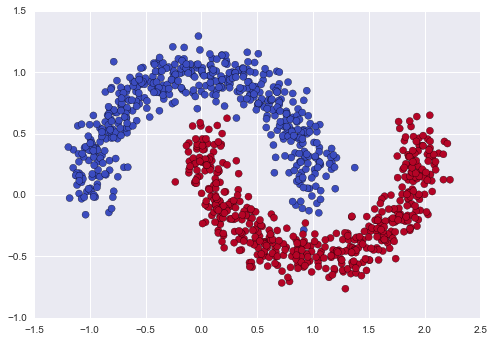

In [22]:
### use the exact dataset below for this problem
from sklearn.datasets import make_moons
np.random.seed(0)
X, Y = make_moons(1000, noise=0.11)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In order to get decent separation between the red and blue points we needed several hidden units. Here we want to see what kind of classification error we can get if we _first process the data with Kernel PCA_.

__(a)__ When you use the 2-layer neural classifier on this dataset (just like in the lecture notebook) what's the best test performance you can get when using no more than 10 hidden units? Plot the resulting decision boundary. (Note that we just set the test set equal to the training set)

__(b)__ What kind of classification performance can you get if you _first_ transform the data using Kernel PCA and _then_ run a 2-layer neural classifier on the transformed data? What's the minimum number of hidden units you need to outperform the classifier in part (a)? What kernel and kernel settings did you use? How well can you do if you only use a _single_ hidden unit in the neural network? _Note: you needn't and/or may not want to use all the components of the kernel transformation._
